Question 1
==

In [1]:
β=0.95; T=20; μ=1; Σ_0=0.5; R=0.5;

Let's calculate the $\Sigma$ values:

In [2]:
Σ = zeros(T+2) #Σ[1] is Σ_0, Σ[22] is Σ_21
Σ[1] = Σ_0
for t in 2:T+2
    Σ[t] = (1-Σ[t-1]/(Σ[t-1]+R))*Σ[t-1]*(1-Σ[t-1]/(Σ[t-1]+R)) + Σ[t-1]/(Σ[t-1]+R)*R*Σ[t-1]/(Σ[t-1]+R)
end

To find the reservation wage I write the equation into one function and look for its root:

In [3]:
using Distributions
using Roots

function init_res(Σ, m_next, Q)
    return function eval_equation(m) 
        equation = m + β*(  β*Q*cdf(Normal(m,Σ), m_next) 
                + 1/(1-β)*mean(Truncated(Normal(m,Σ), m_next, Inf))*(1-cdf(Normal(m,Σ), m_next))  ) - β*Q
        
        return equation < Inf ? equation : -5 #the truncated normal returns Inf if a division by zero occurs
    end
end 

init_res (generic function with 1 method)

In [4]:
function iterate_Q(Q)
    θ=zeros(T+2) #θ[1] is θ_0 the reservation wage in t=0
    θ[22] = (1-β)*β*Q

    for t in reverse(collect(2:(T+2)))
        θ[t-1] = fzero(init_res(Σ[t], θ[t], Q), θ[t]*1/2, 2)
        if abs(θ[t-1]-θ[t]*1/2)<1e-02
            println("bracket is wrong!")
            println(t)
            println(Q)
        end
    end
    
    return β*Q*cdf(Normal(μ,Σ_0), θ[1]) + 1/(1-β)*mean(Truncated(Normal(μ,Σ_0), θ[1], Inf))*(1-cdf(Normal(μ,Σ_0), θ[1]))
end

iterate_Q (generic function with 1 method)

In [5]:
Q_forward = [iterate_Q(Q) for Q in collect(linspace(18,30,100))];

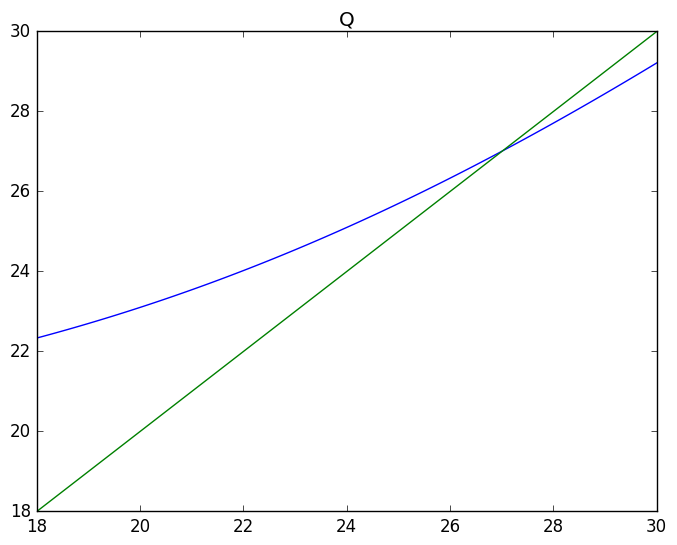

In [6]:
using PyPlot
plot(linspace(18,30,100), Q_forward)
plot(linspace(18,30,100),linspace(18,30,100))
title("Q");

In [7]:
fzero(Q -> Q - iterate_Q(Q),24,28)

27.01287409873506

In [8]:
Q=27.01287409873506;

In [9]:
θ_T1 = (1-β)*β*Q

1.2831115196899165

Period T's reservation wage:

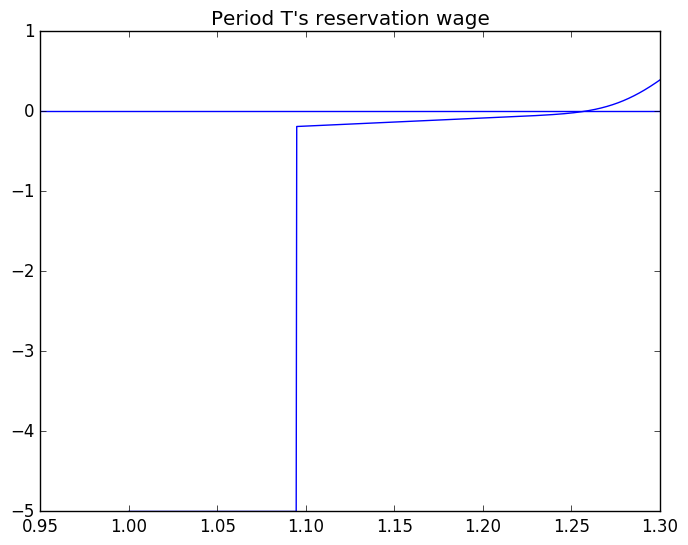

PyObject <matplotlib.text.Text object at 0x31cb2f4e0>

In [10]:
using PyPlot
plot(linspace(1,1.3,1000), [init_res(Σ[22],θ_T1,Q)(t) for t in collect(linspace(1,1.3,1000))])
axhline(0);
title("Period T's reservation wage")

In [17]:
θ=zeros(T+2) #θ[1] is θ_0 the reservation wage in t=0
θ[22] = (1-β)*β*Q

for t in reverse(collect(2:(T+2)))
    θ[t-1] = fzero(init_res(Σ[t],θ[t],Q),θ[t]*1/2,1.3)
    if abs(θ[t-1]-θ[t]*1/2)<1e-02
        println("bracket is wrong!")
        println(t)
    end
end

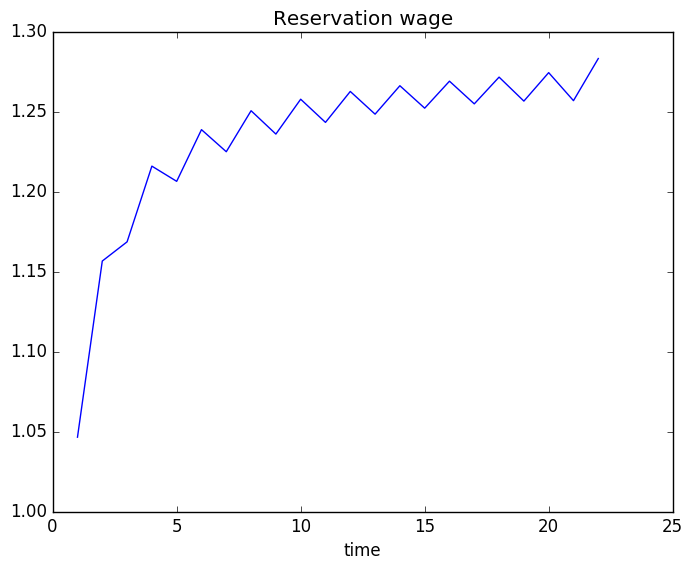

In [18]:
plot(1:length(θ),θ);
title("Reservation wage")
xlabel("time");

In [19]:
Q_new = β*Q*cdf(Normal(μ,Σ_0), θ[1]) + 1/(1-β)*mean(Truncated(Normal(μ,Σ_0), θ[1], Inf))*(1-cdf(Normal(μ,Σ_0), θ[1]))

27.012874098735058

Q was correct!

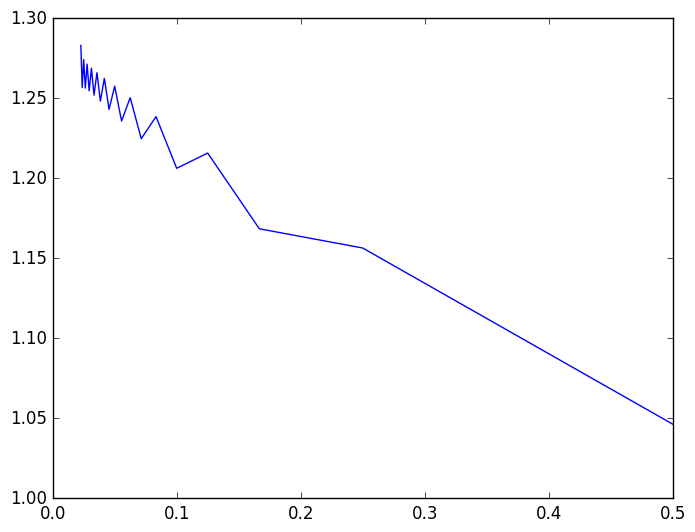

In [20]:
plot(Σ,θ);

Now let's fix period T, vary $\Sigma_T$ and find the reservation wage:

In [21]:
wage(σ) = fzero(init_res(σ, θ[22], Q), (1-β)*β*Q*1/2, 2)

wage (generic function with 1 method)

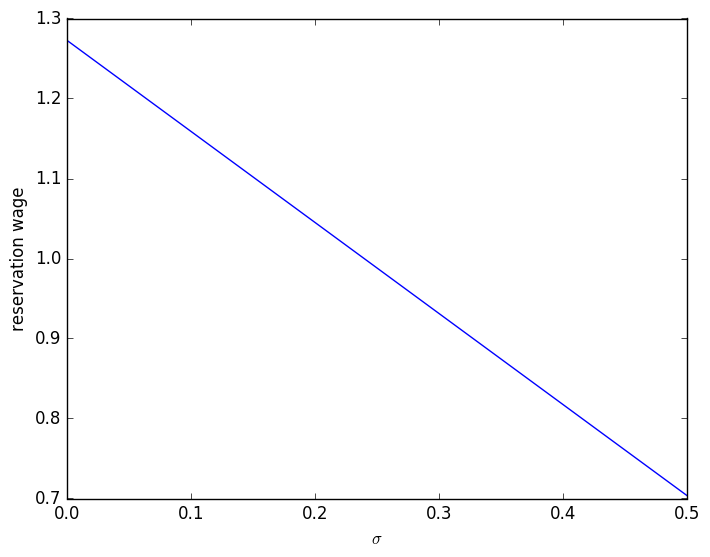

In [24]:
plot(linspace(0.001,0.5,1000),[wage(σ) for σ in linspace(0.01,0.5,1000)]);
ylabel("reservation wage")
xlabel(L"$\sigma$");

Wow, that looks quite linear!